Plots and Figures for Glint


Bar Plot Function for Glint Data

Simply insert your parameters and this function will create a barplot to plot the mean accuracy for each condition (Natural, Feature, Shape)

    Parameters:
    - data: DataFrame to plot
    - x_col: column name for x-axis
    - y_col: column name for y-axis
    - title: plot title
    - xlabel: x-axis label
    - ylabel: y-axis label
    - y_min: minimum y-axis limit
    - y_max: maximum y-axis limit
    - palette: color palette for bars
    
    Returns:
    - fig, ax: matplotlib figure and axis objects

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


# Function: glint_barplot

def glint_barplot(data, extreme,chance):

    data = data.copy()
    
    # Rename conditions
    condition_mapping = {
        'natural': 'Natural',
        'scrambled': 'Feature',
        'line_drawing': 'Shape'
    }
    data['condition'] = data['condition'].map(condition_mapping)
    if extreme == False:
        sns.set_theme(style="white")
        fig, ax1 = plt.subplots(figsize=(4, 5))
        sns.barplot(
            data= data,
            x= 'condition',
            y= 'filtered_acc',
            hue = 'condition',
            ax=ax1,
            capsize=0,
            errorbar=("ci", 95),
            palette = 'magma',
            legend=False,
            gap=0.1,
            width=0.8,
            err_kws={
                'linewidth': 4,      # Thickness of error bar lines
                'color': 'black',      # Color of error bars
                'alpha': 1,        # Transparency (0=invisible, 1=opaque)
    }
            )
        
        #Add individual subjects mean scores for that condition over the barplots
        sns.stripplot(
            data, x='condition', 
            y='filtered_acc', 
            hue='condition', 
            palette='magma', 
            ax=ax1, 
            size=3.5, 
            edgecolor='black', 
            linewidth= 0.8, 
            marker='o',
            alpha = 0.75
        )
        
        ax1.set_ylim(0.1, 1.0)
        ax1.set_ylabel('Accuracy')
        ax1.set_xlabel('Condition')
        ax1.axhline(y=chance, color='black', linestyle='--', linewidth=1.5, zorder=11)


        plt.tight_layout()
        print(f"This is the plot for {experiment} Glint, extreme={extreme}")
        return fig, ax1
    elif extreme == True: 
        sns.set_theme(style="white")
        # Create a figure & axis here so the cell is self-contained
        fig2, ax2 = plt.subplots(figsize=(8, 6))

        # Draw a pointplot (specify order so x-axis goes from largest → smallest)
        sns.pointplot(
            data=data,
            x="stimulus_duration",
            y="filtered_acc",
            hue="condition",
            ax=ax2,
            order=[0.3, 0.136, 0.068, 0.034],
            capsize=0,
            errorbar= ("ci", 95),
            palette = 'magma',
            legend=False,
            err_kws={
                'linewidth': 4,      # Thickness of error bar lines
                'color': 'black',      # Color of error bars
                'alpha': 1,        # Transparency (0=invisible, 1=opaque)
                'markeredgewidth': 2,  # Width of the marker edge
    }

            )
        ax2.set_ylim(0.1, 1.0)
        ax2.set_ylabel('Accuracy')
        ax2.set_xlabel('Duration (ms)')
        ax2.axhline(y=chance, color='black', linestyle='--', linewidth=1.5, zorder=11)
        plt.tight_layout()
        plt.show()
        print(f"This is the plot for {experiment} Glint, extreme={extreme}")
        return fig2, ax2





In [8]:
def modelling_barplot(data, chance):

    sns.set_theme(style="white")
    fig, ax1 = plt.subplots(figsize=(8, 5))
    sns.barplot(
        data= data,
        x= 'condition',
        y= 'acc',
        hue = 'model',
        ax=ax1,
        capsize=0,
        errorbar=("ci", 95),
        palette = 'inferno',
        legend=True,
        gap=0.1,
        width=0.8,
        err_kws={
            'linewidth': 4,      # Thickness of error bar lines
            'color': 'black',      # Color of error bars
            'alpha': 1,        # Transparency (0=invisible, 1=opaque)
        })
    ax1.set_ylim(0, 1.0)
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Condition')
    ax1.axhline(y=chance, color='black', linestyle='--', linewidth=1.5, zorder=11)
    return fig, ax1

def modelling_pointplot(data, chance):
    fig, ax1 = plt.subplots(figsize=(8, 5))
    # Draw a pointplot (specify order so x-axis goes from largest → smallest)
    sns.pointplot(
        data=data,
        x="condition",
        y="acc",
        hue="model",
        ax=ax1,
        capsize=0,
        errorbar= ("ci", 95),
        palette = 'magma',
        legend=False,
        err_kws={
            'linewidth': 4,      # Thickness of error bar lines
            'color': 'black',      # Color of error bars
            'alpha': 1,        # Transparency (0=invisible, 1=opaque)
            'markeredgewidth': 2,  # Width of the marker edge
    })
    ax1.set_ylim(0.1, 1.0)
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Condition')
    ax1.axhline(y=chance, color='black', linestyle='--', linewidth=1.5, zorder=11)
    return fig, ax1

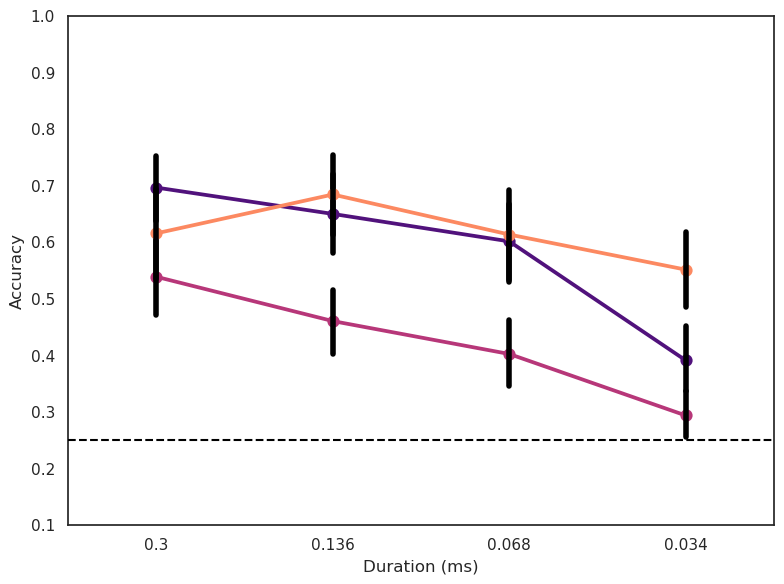

This is the plot for novel Glint, extreme=True


In [9]:
# Parameters
import pandas as pd
experiment = 'novel'  # 'familiar' or 'novel'
extreme = True
if extreme == True:
    version = 'extreme'

elif extreme == False:
    version = 'original'

if experiment == 'familiar' and extreme ==True: #Familiar Extreme Glint
    chance_level = 1/6

elif experiment == 'familiar' and extreme ==False: #Familiar Original Glint
    chance_level = 1/9

elif experiment == 'novel':
    chance_level = 1/4



file_path = f'/zpool/vladlab/data_drive/glint_data/summary_data_csv/{experiment}_glint_{version}_cleaned.csv'
familiar_glint = pd.read_csv(file_path)

# Now use the function
fig, ax1 = glint_barplot(
    data=familiar_glint,
    extreme=extreme,
    chance= chance_level
)
plt.show()

Familiar Experiment: Model Performance

In [10]:
import pandas as pd
# Here are the ConvNeXT KNN results loading and combining
convnext_results_file_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_familiar/convnext_KNN_all_conditions_9way_new.csv'
convnext = pd.read_csv(convnext_results_file_path)

#Clip
clip_vit_results_file_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_familiar/clip_vit_KNN_all_conditions_9way_new.csv'
clip = pd.read_csv(clip_vit_results_file_path)

#resnet50
#resnet50_results_file_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_familiar/resnet50_KNN_all_conditions_9way_new.csv'
#resnet50 = pd.read_csv(resnet50_results_file_path)
# resnext50
#resnext50_results_file_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_familiar/resnext50_KNN_all_conditions_9way_new.csv'
#resnext50 = pd.read_csv(resnext50_results_file_path)

# vit_dinov2
vit_dinov2_results_file_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_familiar/vit_dinov2_KNN_all_conditions_9way_new.csv'
vit_dinov2 = pd.read_csv(vit_dinov2_results_file_path)

# vit
vit_results_file_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_familiar/vit_KNN_all_conditions_9way_new.csv'
vit = pd.read_csv(vit_results_file_path)

# Combine all model results
combined_model_results = pd.concat([convnext, clip, vit_dinov2, vit], ignore_index=True)

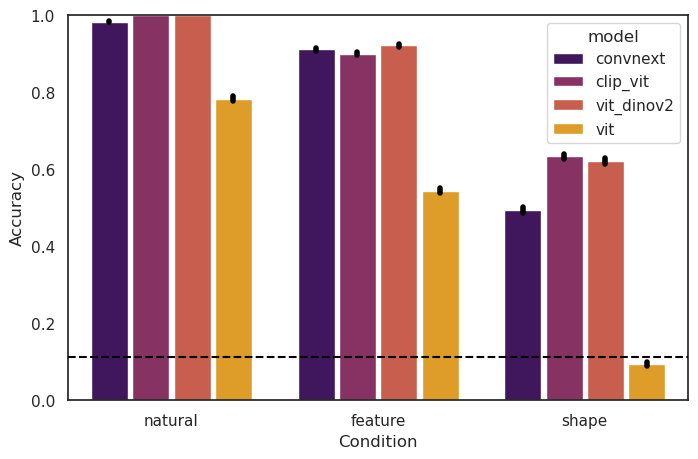

In [11]:
fig, ax1 = modelling_barplot(
    data=combined_model_results,
    chance= 1/9
)
plt.show()


Novel Glint

In [15]:
import pandas as pd
# Here are the ConvNeXT KNN results loading and combining
convnext_novel_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_novel/convnext_KNN_all_conditions_4way.csv'
convnext_csv = pd.read_csv(convnext_novel_path)

#Clip
clip_vit_novel_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_novel/clip_vit_KNN_all_conditions_4way.csv'
clip_csv = pd.read_csv(clip_vit_novel_path)

# vit_dinov2
vit_dinov2_novel_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_novel/vit_dinov2_KNN_all_conditions_4way.csv'
vit_dinov2_csv = pd.read_csv(vit_dinov2_novel_path)

# vit
vit_novel_path = '/zpool/vladlab/active_drive/arsch/GLINT/glint_modeling/results_novel/vit_KNN_all_conditions_4way.csv'
vit_csv = pd.read_csv(vit_novel_path)

# Combine all model results
novel_combined_model_results = pd.concat([convnext_csv, clip_csv, vit_dinov2_csv, vit_csv], ignore_index=True)

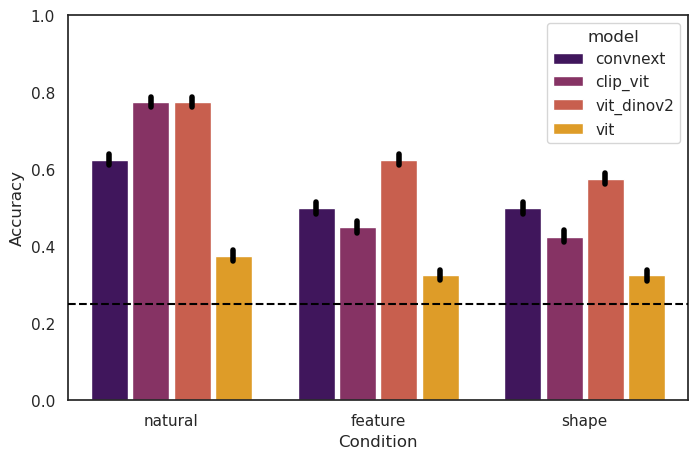

In [16]:
fig, ax1 = modelling_barplot(
    data=novel_combined_model_results,
    chance= 1/4
)
plt.show()